#1.Introducción
##Propósito
El propósito de esta etapa es proporcionar una visión general del proyecto y los objetivos del análisis de datos, explicando el contexto del conjunto de datos y cómo se relaciona con el objetivo comercial de Elo. La exploración y comprensión de los datos de las transacciones y las características de los comercios se realizará para obtener una base sólida que permita un análisis más profundo y, finalmente, la construcción de modelos predictivos que mejoren la experiencia del usuario mediante recomendaciones personalizadas.

Este análisis tiene los siguientes objetivos específicos:

1. Comprender el contexto del negocio: Entender cómo Elo está trabajando con comerciantes y clientes, y cómo las promociones y descuentos pueden impactar la fidelización del cliente.

2. Revisar la calidad y la estructura de los datos: Asegurar que los datos sean adecuados para el modelado posterior y detectar posibles problemas como valores faltantes, errores o anomalías.

3. Explorar las relaciones clave entre variables: Identificar patrones y relaciones entre las variables para comprender qué características son más relevantes para la predicción del "Loyalty score".

4. Identificar oportunidades de mejora y refinamiento de los datos: Encontrar áreas en las que los datos puedan mejorarse o transformarse para obtener una mayor precisión en los modelos predictivos.

###Objetivo General:
Desarrollar un sistema de recomendación basado en machine learning que permita predecir el nivel de lealtad futura de los tarjetahabientes, con el fin de mejorar la personalización de promociones y maximizar el retorno para comercios aliados.

###Objetivos Específicos
1. Identificar patrones de comportamiento de compra que influyen en la lealtad de los clientes.
2. Anticipar el score de lealtad futura de los tarjetahabientes con base en sus transacciones anteriores.
3. Mejorar la eficiencia en la asignación de promociones comerciales personalizadas.
4. Incrementar la recurrencia de consumo en clientes con alta lealtad estimada.
5. Incorporar el score de lealtad como insumo recurrente en los procesos de toma de decisiones comerciales.

##Objetivos de minería
Desarrollar un sistema de recomendación que prediga el score de lealtad futura de los tarjetahabientes, a partir de sus datos de transacciones pasadas, para:

*Optimizar la personalización de promociones.

*Aumentar la recurrencia de compras.

*Incrementar la fidelización del cliente.

*Maximizar el retorno para los comercios aliados.


##Archivos:
- train.csv: el conjunto de entrenamiento
- test.csv: el conjunto de prueba
- historical_transactions.csv: hasta 3 meses de transacciones históricas para cada card_id
- new_merchant_transactions.csv: dos meses de datos para cada card_id que contienen TODAS las compras realizadas por card_id en merchant_ids que no se vieron en los datos históricos.
- merchants.csv: información adicional sobre todos los comercios/commerce_ids del conjunto de datos.

#2.Carga de los Datos

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [ ]:
!ls

merchants.csv  new_merchant_transactions.csv  sample_data  train.csv


In [ ]:
# Carga de datasets
vdf_train = pd.read_csv('train.csv')
vdf_test = pd.read_csv('test.csv')
# vdf_hist_trans = pd.read_csv('historical_transactions.csv')
vdf_new_trans = pd.read_csv('new_merchant_transactions.csv')
vdf_merchants = pd.read_csv('merchants.csv')

In [ ]:
# Visualización básica de las dimensiones, columnas, tipos de datos y primeras filas (head()).
vdf_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [ ]:
vdf_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [ ]:
# vdf_hist_trans.head() - Tamaño de archivo mayor al permitido, desarrollarlo en local

In [ ]:
vdf_new_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [ ]:
vdf_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


#3.Descripción General de los Datos

## train.csv: descripción de variables, distribución del target (score de lealtad).
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|
|`target` |Puntuación numérica de fidelidad calculada 2 meses después del período histórico y de evaluación|

##test.csv: estructura y comparación con train.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|

##historical_transactions.csv: cantidad de registros por tarjeta, valores típicos.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Fecha de compra|
|`category_3` |Fecha de compra|
|`installments` |Fecha de compra|
|`category_1` |Fecha de compra|
|`purchase_date` |Fecha de compra|

##new_merchant_transactions.csv: análisis similar al histórico.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Y' si se aprueba, 'N' si se deniega|
|`category_3` |categoría anónima|
|`installments` |número de cuotas de compra|
|`category_1` |categoría anónima|
|`merchant_category_id` |Identificador de categoría de comerciante (anonimizado)|
|`subsector_id` |Identificador del grupo de categorías de comerciantes (anonimizado)|
|`merchant_id` |Identificador del comerciante (anonimizado)|
|`purchase_amount` |Monto de compra normalizado|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

##merchants.csv: cantidad de merchants, categorías, etc.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

#4.Análisis Univariado

##4.1.Merchant

In [ ]:
# Descripción estadística (describe()) por variable.
vdf_merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


<Axes: xlabel='state_id'>

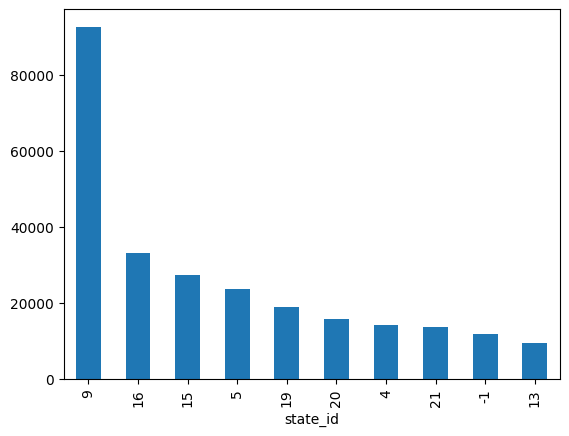

In [ ]:
# Distribución del target (histograma, boxplot, etc).
vdf_merchants['city_id'].nunique()
vdf_merchants['state_id'].value_counts().head(10).plot(kind='bar')


4.1.1 Análisis de variables categóricas

Valores únicos en merchant_category_id: 324
merchant_category_id
705    30666
278    17992
307    17528
367    15387
68     14341
80     13520
222    11582
884    10398
683     9175
560     7988
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

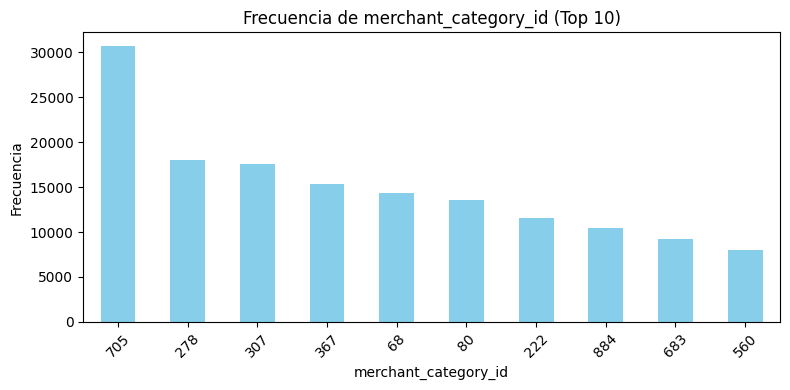

In [ ]:
# Distribuciones por tipo de variable (categórica vs numérica).
#Análisis de merchant_category_id
# Número de categorías únicas
print("Valores únicos en merchant_category_id:", vdf_merchants['merchant_category_id'].nunique())

# Frecuencia de las 10 más comunes
print(vdf_merchants['merchant_category_id'].value_counts().head(10))

# Gráfico de barras
vdf_merchants['merchant_category_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Frecuencia de merchant_category_id (Top 10)")
plt.xlabel("merchant_category_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show



Valores únicos en subsector_id: 41
subsector_id
27    51678
37    35575
33    30887
34    26533
21    24207
29    21588
19    20361
16    16435
18    14279
20     9528
Name: count, dtype: int64


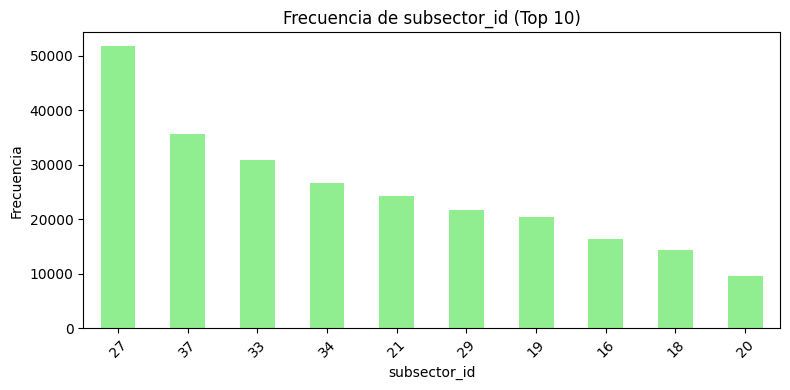

In [ ]:
#Análisis de subsector_id
print("Valores únicos en subsector_id:", vdf_merchants['subsector_id'].nunique())
print(vdf_merchants['subsector_id'].value_counts().head(10))

['subsector_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='lightgreen')
plt.title("Frecuencia de subsector_id (Top 10)")
plt.xlabel("subsector_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribución de most_recent_sales_range:
most_recent_sales_range
E    177104
D    117475
C     34075
B      5037
A      1005
Name: count, dtype: int64


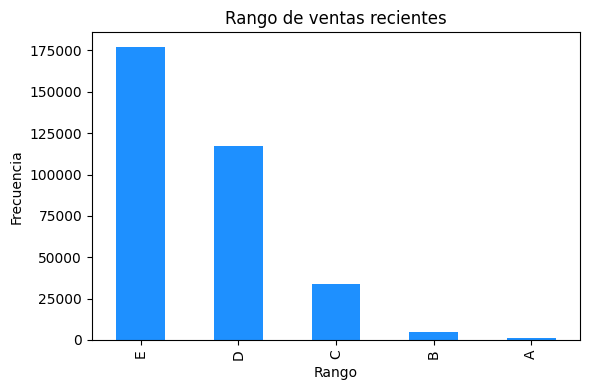

In [ ]:
#Análisis de most_recent_sales_range
orden = ['E', 'D', 'C', 'B', 'A']
ventas = vdf_merchants['most_recent_sales_range'].value_counts().reindex(orden)

print("Distribución de most_recent_sales_range:")
print(ventas)

ventas.plot(kind='bar', figsize=(6, 4), color='dodgerblue')
plt.title("Rango de ventas recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


En el gráfico de barras se puede observar la distribución del rango de ingresos recientes de los comercios donde A es el rango más alto y E el más bajo. Mientras que el rango A que representa los mayores ingresos activos tiene una frecuencia mucho menor lo que indica que la mayoría de los comercios tienen ingresos recientes en los rangos más bajos especialmente en el rango E con una alta concentración Esto sugiere que la distribución de ingresos entre los comercios es muy asimétrica con un gran número de comercios generando menos ingresos recientes

Distribución de most_recent_purchases_range:
most_recent_purchases_range
E    175309
D    119187
C     34144
B      5046
A      1010
Name: count, dtype: int64


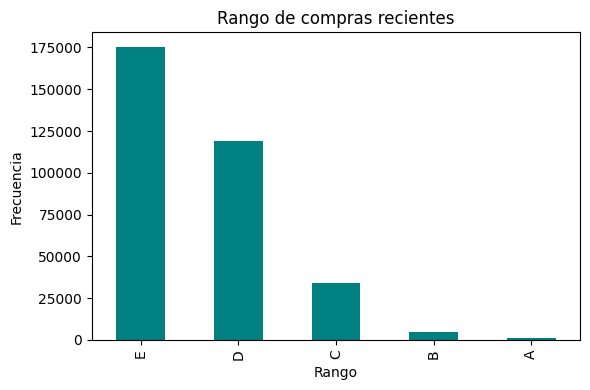

In [ ]:
#Análisis de most_recent_purchases_range
compras = vdf_merchants['most_recent_purchases_range'].value_counts().reindex(orden)

print("Distribución de most_recent_purchases_range:")
print(compras)

compras.plot(kind='bar', figsize=(6, 4), color='teal')
plt.title("Rango de compras recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


**4.1.2 Análisis de variables numéricas**

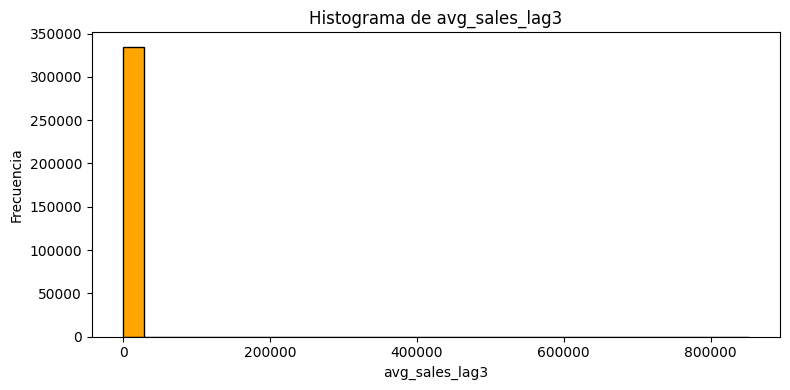

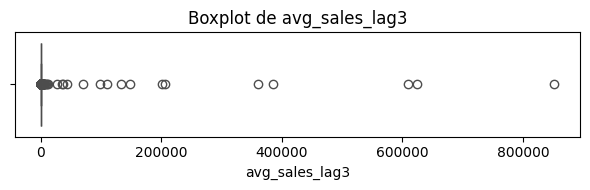

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(vdf_merchants['avg_sales_lag3'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title("Histograma de avg_sales_lag3")
plt.xlabel("avg_sales_lag3")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['avg_sales_lag3'], color='orange')
plt.title("Boxplot de avg_sales_lag3")
plt.tight_layout()
plt.show()


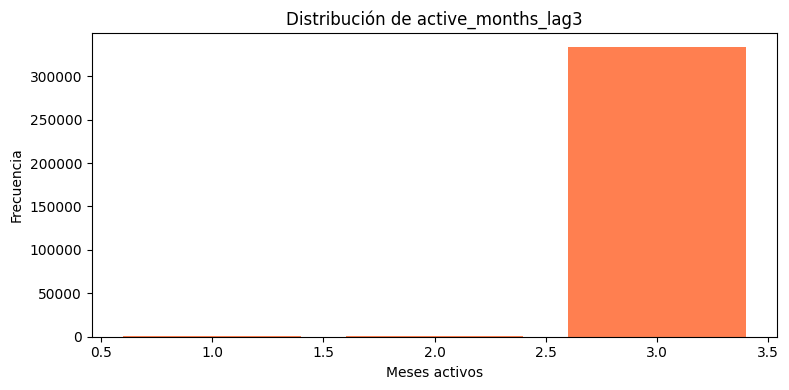

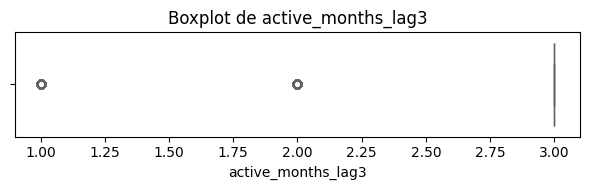

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(vdf_merchants['active_months_lag3'].value_counts().sort_index().index,
        vdf_merchants['active_months_lag3'].value_counts().sort_index().values,
        color='coral')
plt.title("Distribución de active_months_lag3")
plt.xlabel("Meses activos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['active_months_lag3'], color='coral')
plt.title("Boxplot de active_months_lag3")
plt.tight_layout()
plt.show()


In [ ]:
# Conteo de valores nulos
vdf_merchants.isnull().sum()


,0
merchant_id,0
merchant_group_id,0
merchant_category_id,0
subsector_id,0
numerical_1,0
numerical_2,0
category_1,0
most_recent_sales_range,0
most_recent_purchases_range,0
avg_sales_lag3,13


In [ ]:
# Conteo total de filas duplicadas
vdf_merchants.duplicated().sum()


np.int64(0)

##4.2.Train

In [ ]:
#Estadísticas básicas
vdf_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


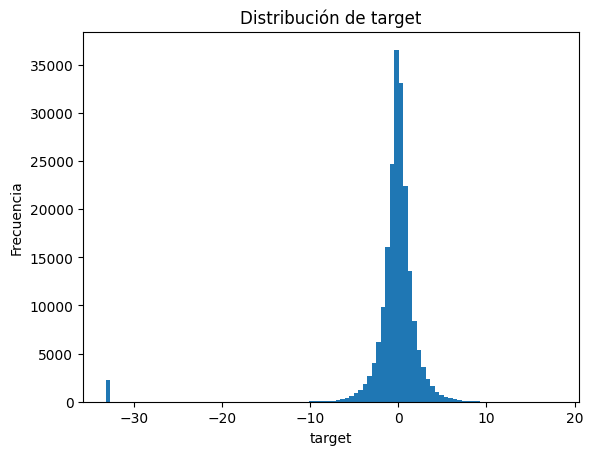

In [ ]:
# Distribución del target (histograma, boxplot, etc).
plt.hist(vdf_train['target'], bins=100)
plt.title('Distribución de target')
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los tarjetahabientes tienen un score de lealtad (target) cercano a cero Esto sugiere que una gran parte de la base de clientes tiene una lealtad neutral o promedio Los scores se distribuyen alrededor de cero. Los valores extremos son menos comunes aunque existen tarjetahabientes con scores negativos (menor lealtad) y scores positivos (mayor lealtad) La presencia de valores muy bajos en el target podría indicar tarjetahabientes con baja lealtad o incluso abandono

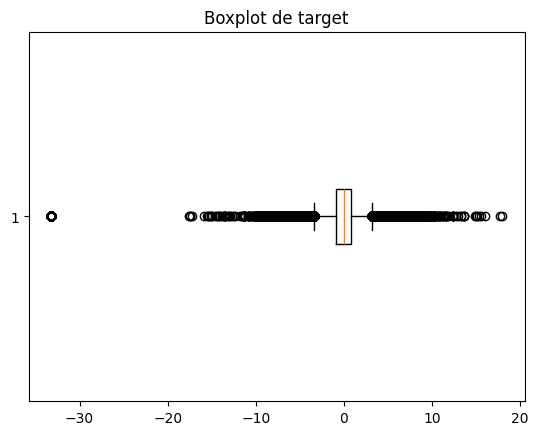

In [ ]:
plt.boxplot(vdf_train['target'], vert=False)
plt.title('Boxplot de target')
plt.show()


Distribución de feature_1:
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64




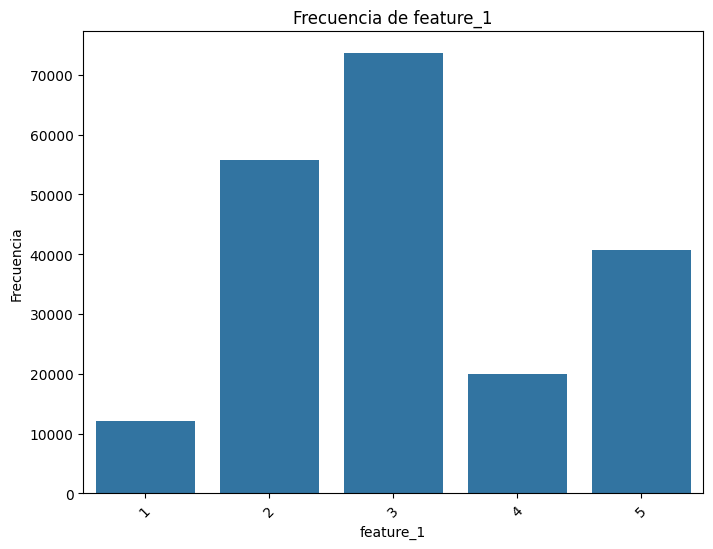

Distribución de feature_2:
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64




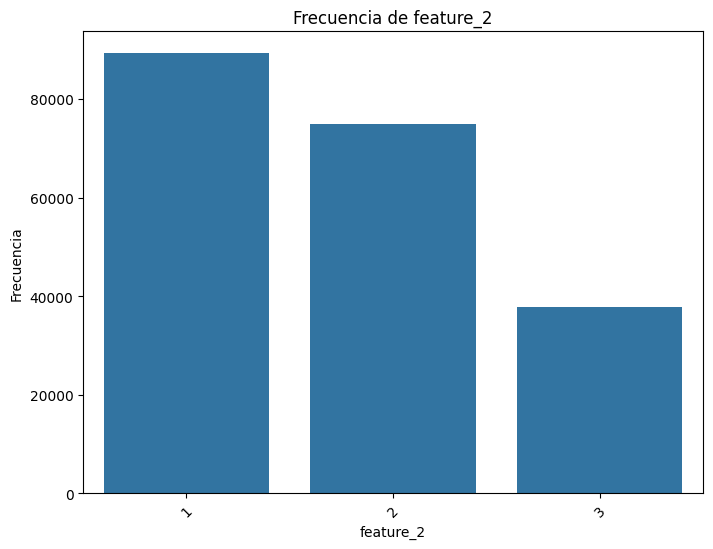

Distribución de feature_3:
feature_3
1    114198
0     87719
Name: count, dtype: int64




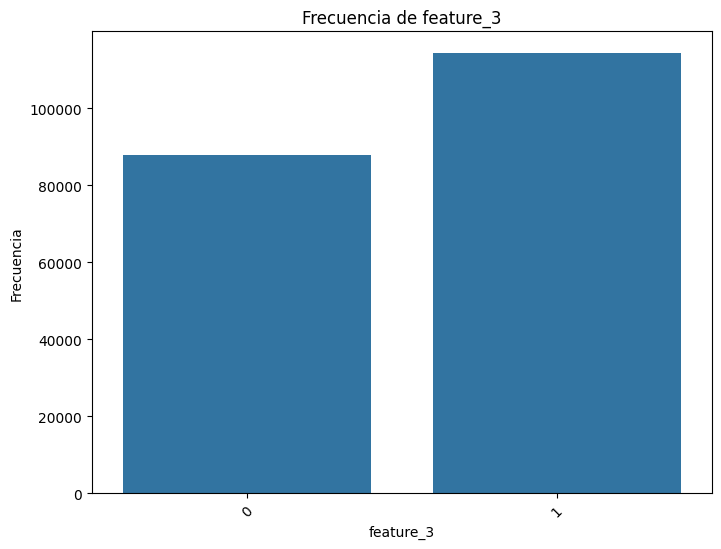

In [ ]:
# Distribuciones de las variables
for feature in ['feature_1', 'feature_2', 'feature_3']:
    print(f"Distribución de {feature}:")
    print(vdf_train[feature].value_counts())
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_train, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Conteo de valores nulos, duplicados, outliers simples.
print("Número de valores únicos en 'card_id':", vdf_train['card_id'].nunique())
print("¿Existen duplicados en 'card_id'?", vdf_train['card_id'].duplicated().any())

Número de valores únicos en 'card_id': 201917
¿Existen duplicados en 'card_id'? False


##4.3 new_merchant_transactions

In [ ]:
vdf_new_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01



Distribución de category_1:
category_1
N    1899935
Y      63096
Name: count, dtype: int64


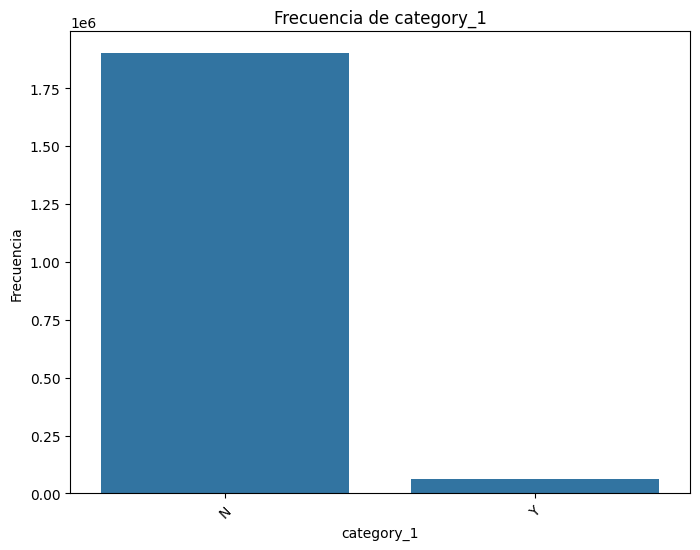


Distribución de category_2:
category_2
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: count, dtype: int64


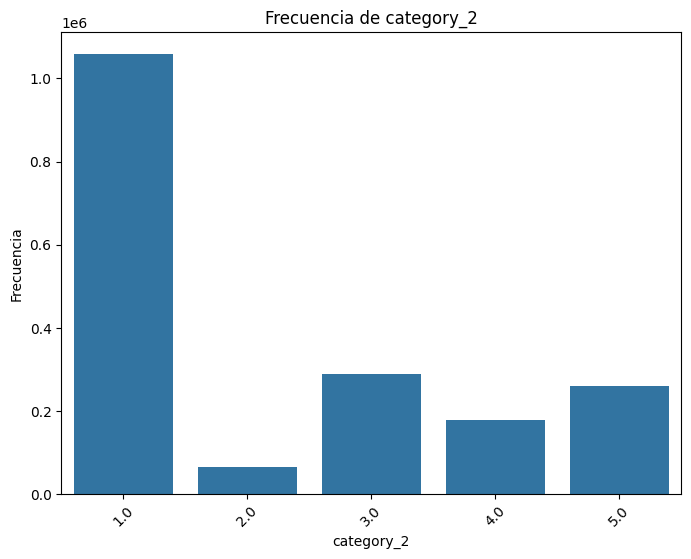


Distribución de category_3:
category_3
A    922244
B    836178
C    148687
Name: count, dtype: int64


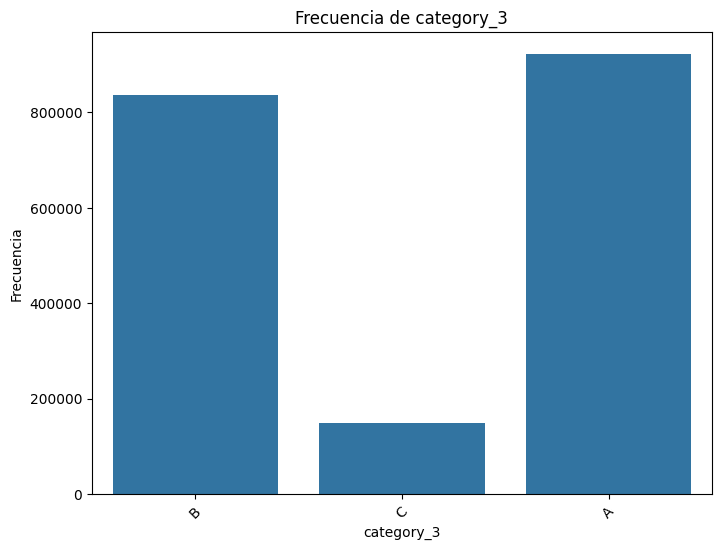

In [ ]:
# Análisis de variables categóricas
categorical_features = ['category_1', 'category_2', 'category_3']

for feature in categorical_features:
    print(f"\nDistribución de {feature}:")
    print(vdf_new_trans[feature].value_counts())

    # Graficar la frecuencia de las categorías
    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_new_trans, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


Estadísticas descriptivas de variables numéricas:
       purchase_amount  installments
count     1.963031e+06  1.963031e+06
mean     -5.509690e-01  6.829643e-01
std       6.940043e-01  1.584069e+00
min      -7.468928e-01 -1.000000e+00
25%      -7.166294e-01  0.000000e+00
50%      -6.748406e-01  1.000000e+00
75%      -5.816162e-01  1.000000e+00
max       2.631575e+02  9.990000e+02


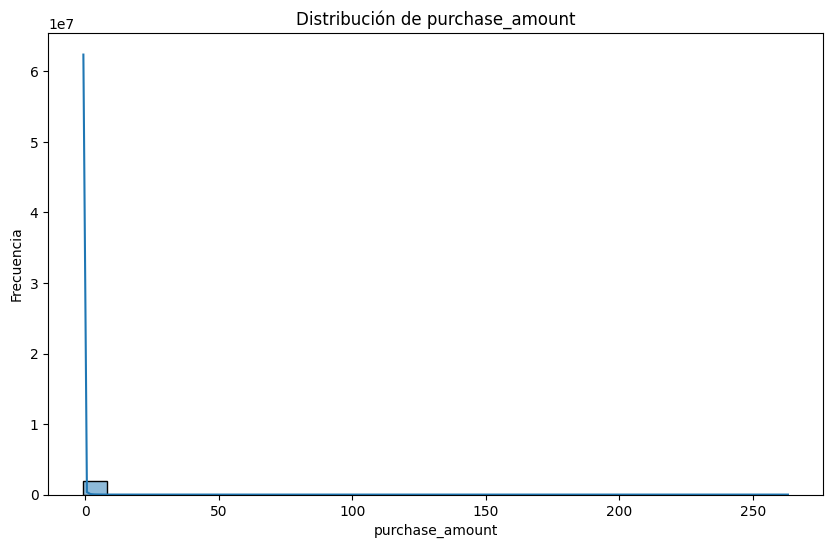

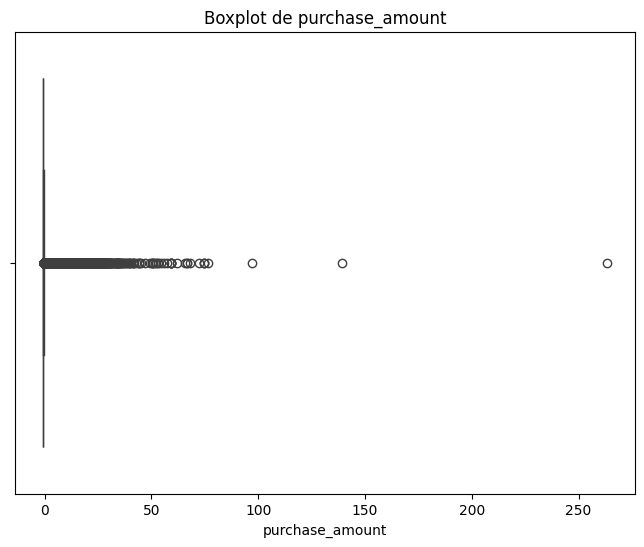

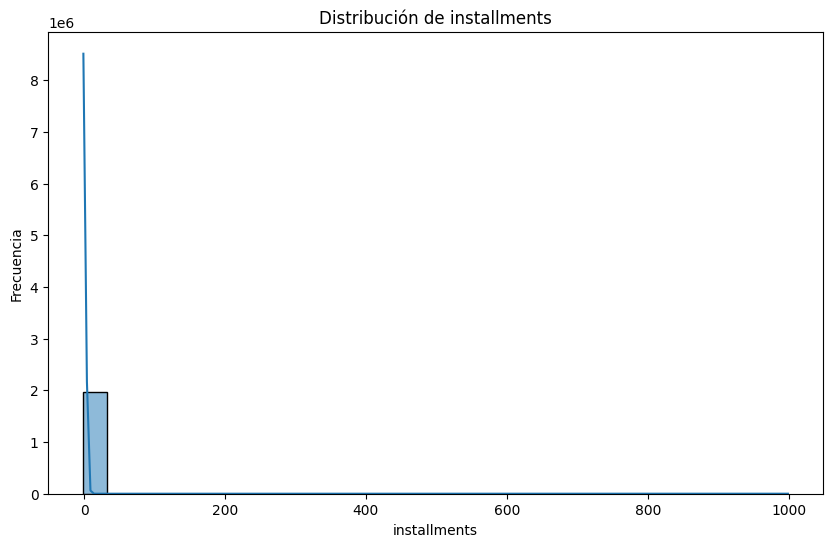

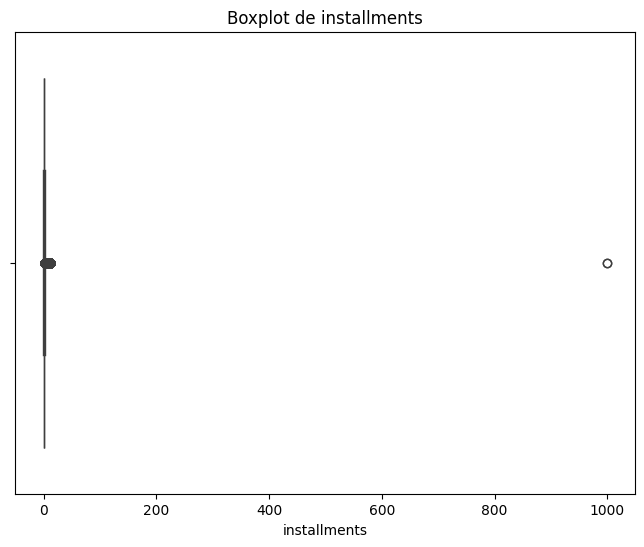

In [ ]:
# Análisis de variables numéricas
numerical_features = ['purchase_amount', 'installments']

# Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(vdf_new_trans[numerical_features].describe())

# Histogramas y KDE de las variables numéricas
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(vdf_new_trans[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para detectar outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=vdf_new_trans[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

In [ ]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_new_trans.isnull().sum())


Valores nulos en el conjunto de datos:
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64


##4.4 Historical_transactions

In [ ]:
#Variables categóricas y numéricas
categorical_vars = [
    'authorized_flag', 'card_id', 'city_id', 'category_1', 'category_3',
    'merchant_category_id', 'merchant_id', 'category_2', 'state_id', 'subsector_id'
]

numerical_vars = [
    'installments', 'month_lag', 'purchase_amount'
]

sns.set(style="whitegrid")

#Análisis variables categóricas
print("Análisis variables categóricas:\n")
for col in categorical_vars:
    print(f"Variable: {col}")
    print(f"- Número de categorías únicas: {vdf_hist_trans[col].nunique()}")
    print(f"- Frecuencia de valores:\n{vdf_hist_trans[col].value_counts(dropna=False).head(10)}\n")

    # Graficar top 10 categorías
    top_categories = vdf_hist_trans[col].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")
    plt.title(f"Top 10 categorías en '{col}'")
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()



Análisis variables categóricas:

Variable: authorized_flag


NameError: name 'vdf_hist_trans' is not defined

In [ ]:
#Análisis variables numéricas
print("\nAnálisis variables numéricas:\n")
print(vdf_hist_trans[numerical_vars].describe())

for col in numerical_vars:
    print(f"\nVariable: {col}")
    print(f"- Valores nulos: {vdf_hist_trans[col].isnull().sum()}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(vdf_hist_trans[col].dropna(), kde=True, color='blue')
    plt.title(f'Histograma y KDE de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=vdf_hist_trans[col], color='orange')
    plt.title(f'Boxplot de {col}')

    plt.show()

In [ ]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_hist_trans.isnull().sum())

#5.Análisis Multivariado

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('train.csv')
df['first_active_month'] = pd.to_datetime(df['first_active_month'])

# Definir fecha de referencia
fecha_referencia = pd.to_datetime('2018-03-01')  # puede ajustarse si sabes la fecha real de corte

# Calcular la cantidad de meses activos hasta la fecha de referencia
df['meses_actividad'] = (fecha_referencia.to_period('M') - df['first_active_month'].dt.to_period('M')).apply(lambda x: x.n)


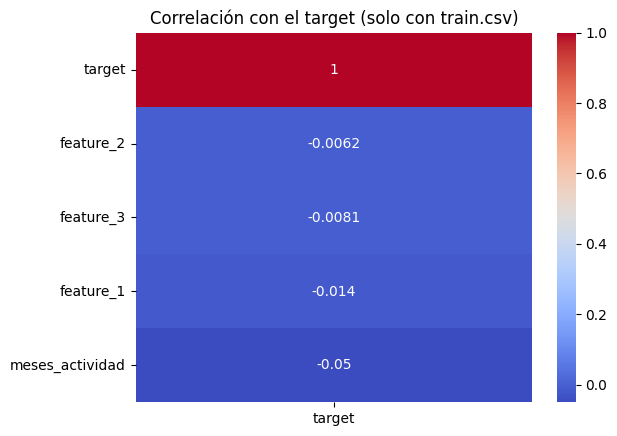

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# columnas numéricas relevantes
corr_cols = ['feature_1', 'feature_2', 'feature_3', 'meses_actividad', 'target']
corr = df[corr_cols].corr()

# Visualizamos la correlación con el target
sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target (solo con train.csv)')
plt.show()


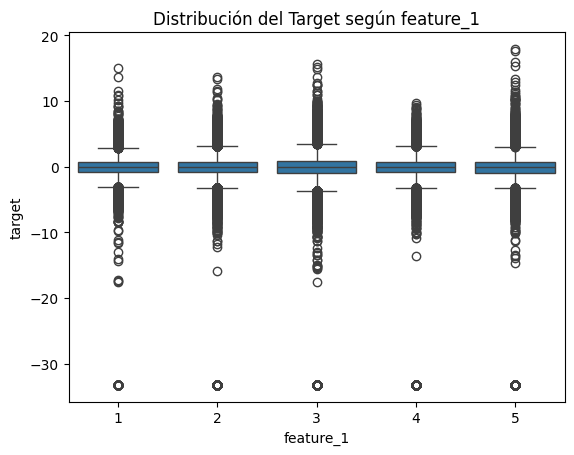

Promedio del Target por feature_1:
feature_1
1   -0.315476
2   -0.350452
3   -0.377533
4   -0.404652
5   -0.499879
Name: target, dtype: float64
--------------------------------------------------


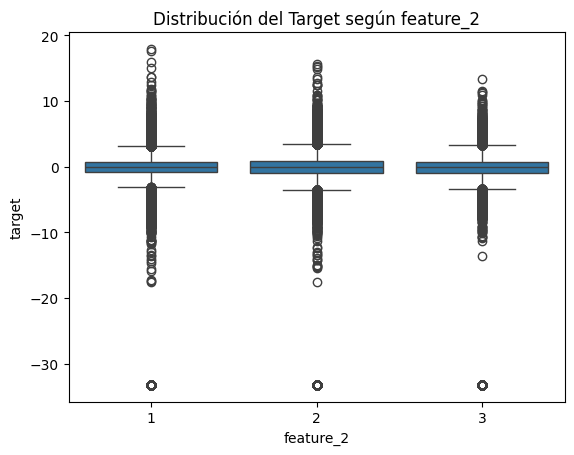

Promedio del Target por feature_2:
feature_2
2   -0.332899
1   -0.398675
3   -0.501889
Name: target, dtype: float64
--------------------------------------------------


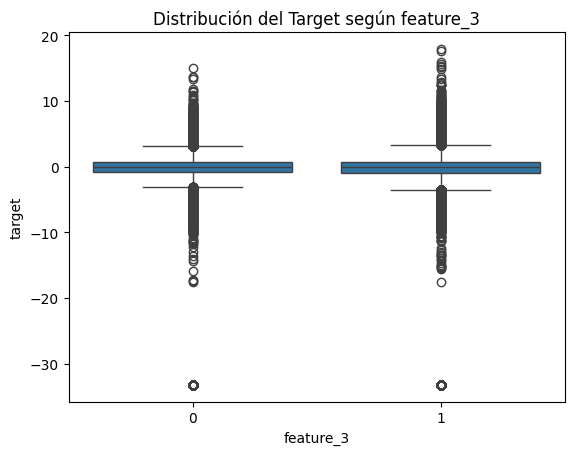

Promedio del Target por feature_3:
feature_3
0   -0.357939
1   -0.421057
Name: target, dtype: float64
--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['feature_1', 'feature_2', 'feature_3']
# Cargar el dataset
train = pd.read_csv('train.csv')

for feature in features:
    # Gráfico boxplot
    sns.boxplot(data=train, x=feature, y='target')
    plt.title(f'Distribución del Target según {feature}')
    plt.show()

    # Promedio agrupado por la feature
    print(f"Promedio del Target por {feature}:")
    print(train.groupby(feature)['target'].mean().sort_values(ascending=False))
    print("-" * 50)


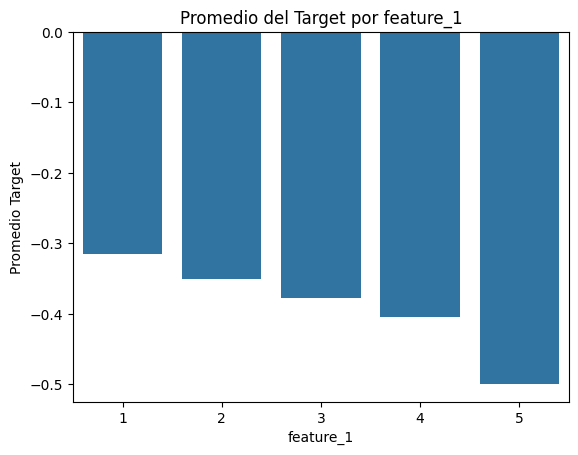

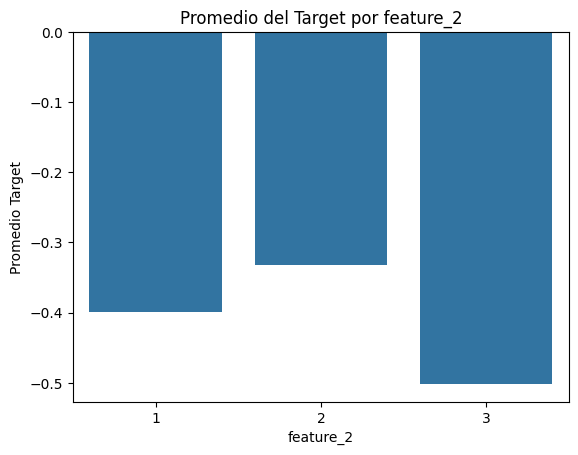

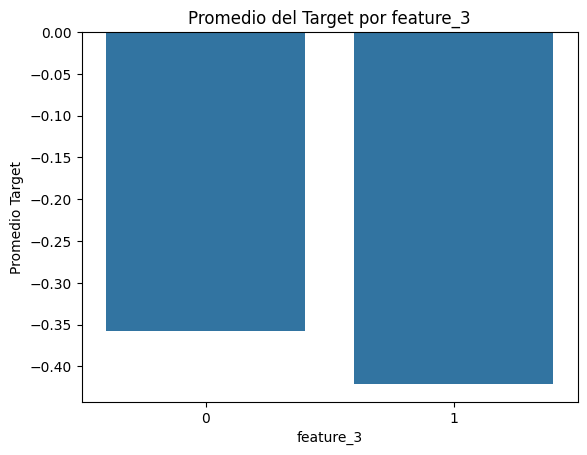

In [ ]:
for feature in features:
    means = train.groupby(feature)['target'].mean().sort_values(ascending=False)
    sns.barplot(x=means.index, y=means.values)
    plt.title(f'Promedio del Target por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Promedio Target')
    plt.show()


In [ ]:
for feature in features:
    summary = train.groupby(feature)['target'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
    print(f"Resumen estadístico del target por {feature}:\n")
    print(summary)
    print("-" * 50)


Resumen estadístico del target por feature_1:

               mean    median       std  count
feature_1                                     
1         -0.315476 -0.011003  3.407106  12037
2         -0.350452  0.000000  3.756032  55797
3         -0.377533 -0.036539  3.834499  73573
4         -0.404652  0.000000  3.817954  19885
5         -0.499879 -0.056208  4.134833  40625
--------------------------------------------------
Resumen estadístico del target por feature_2:

               mean    median       std  count
feature_2                                     
2         -0.332899 -0.045086  3.567683  74839
1         -0.398675 -0.002394  3.890548  89242
3         -0.501889 -0.033784  4.269270  37836
--------------------------------------------------
Resumen estadístico del target por feature_3:

               mean    median       std   count
feature_3                                      
0         -0.357939  0.000000  3.724459   87719
1         -0.421057 -0.044637  3.944379  114198
-

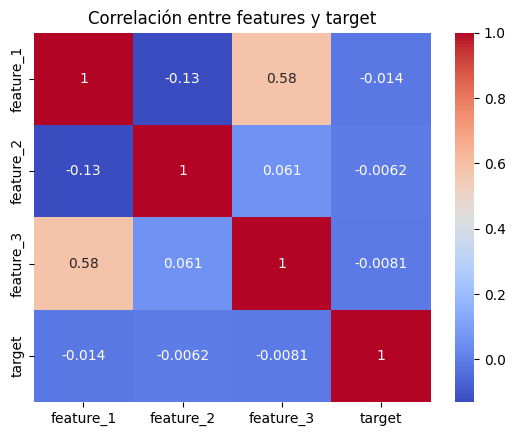

In [ ]:
sns.heatmap(train[features + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre features y target')
plt.show()


Correlación con el target:
feature_1: correlación ≈ -0.014

Muy cercana a 0 → sin correlación lineal significativa con el target.

feature_2: correlación ≈ -0.0062

Igual que feature_1, prácticamente nula. No aporta relación lineal útil.

feature_3: correlación ≈ -0.0081

También sin correlación lineal significativa.

Correlación entre features:
feature_1 y feature_3: 0.58

Correlación moderadamente fuerte y positiva.

Esto sugiere posible redundancia (podrían estar aportando información similar).

feature_1 y feature_2: -0.13 (ligeramente negativa)

feature_2 y feature_3: 0.061 (muy débil)

In [ ]:
import pandas as pd
from datetime import datetime

# Convertir la columna a datetime
train['first_active_month'] = pd.to_datetime(train['first_active_month'])

# Fecha de referencia
fecha_corte = datetime(2018, 3, 1)

# Calcular antigüedad en meses
train['antiguedad_tarjeta_meses'] = (fecha_corte.year - train['first_active_month'].dt.year) * 12 + (fecha_corte.month - train['first_active_month'].dt.month)

# Mostrar resultado
print(train[['first_active_month', 'antiguedad_tarjeta_meses']].head())


  first_active_month  antiguedad_tarjeta_meses
0         2017-06-01                         9
1         2017-01-01                        14
2         2016-08-01                        19
3         2017-09-01                         6
4         2017-11-01                         4


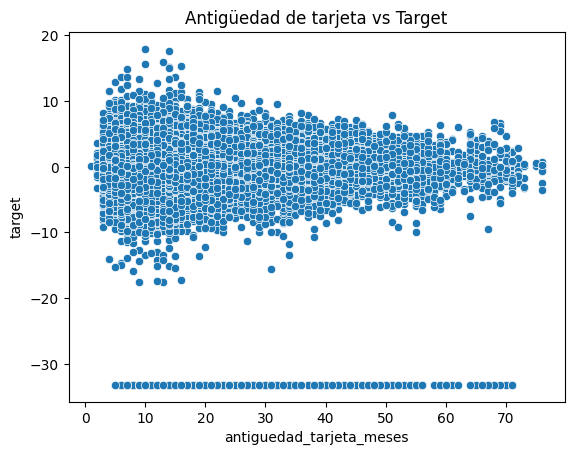

In [ ]:
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train)
plt.title('Antigüedad de tarjeta vs Target')
plt.show()


In [ ]:
train['target'].value_counts().head(10)


,count
target,
-33.219281,2207
0.000000,1630
1.000000,117
-1.000000,81
-0.584963,35
0.584963,28
-1.321928,19
0.284918,17
1.584963,14


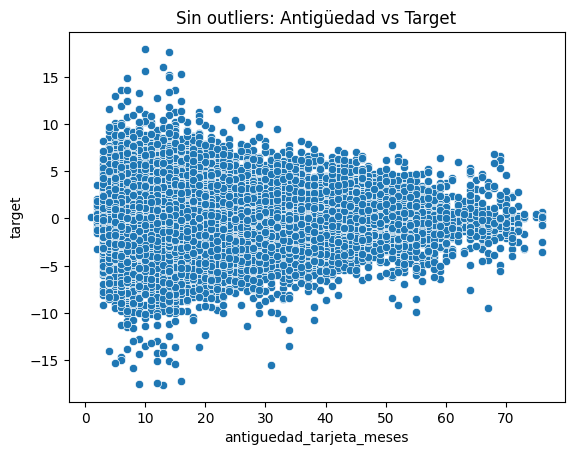

In [ ]:
# Filtrar outliers extremos
train_filtrado = train[train['target'] > -30]

# Ver relación con antigüedad
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train_filtrado)
plt.title('Sin outliers: Antigüedad vs Target')
plt.show()


antiguedad_grupo
0-12    -0.217745
13-24   -0.589676
25-36   -0.671942
37-48   -0.671680
49-60   -0.851753
61-72   -1.277757
Name: target, dtype: float64


<ipython-input-53-bed1356c6668>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()


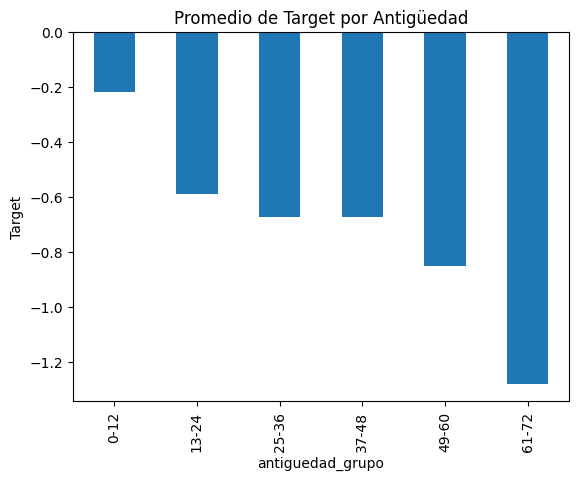

In [ ]:
# Crear grupos por rango de antigüedad
train['antiguedad_grupo'] = pd.cut(train['antiguedad_tarjeta_meses'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

# Media del target por grupo
grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()

print(grupo_mean)
grupo_mean.plot(kind='bar', title='Promedio de Target por Antigüedad')
plt.ylabel('Target')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train[['feature_1', 'feature_2', 'feature_3', 'antiguedad_tarjeta_meses']]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes: [-0.04489186 -0.01074007  0.07607236 -0.0198778 ]
Intercepto: -0.009306342107068266


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)

importances = modelo_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.4f}")


feature_1: 0.1152
feature_2: 0.0798
feature_3: 0.0272
antiguedad_tarjeta_meses: 0.7778


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada:", pca.explained_variance_ratio_)


Varianza explicada: [0.41450771 0.28968419]


A partir del análisis realizado, se observa que las relaciones lineales entre las variables independientes (feature_1, feature_2, feature_3 y antiguedad_tarjeta_meses) y el target son bastante débiles, según los coeficientes obtenidos por regresión lineal. Sin embargo, al utilizar un modelo de Random Forest, se evidencia que la variable antiguedad_tarjeta_meses tiene una importancia significativamente mayor que el resto, representando cerca del 78% de la importancia total. Esto sugiere que existen relaciones no lineales entre las variables y el target que no son captadas por modelos lineales. Además, el análisis de componentes principales (PCA) indica que dos componentes explican aproximadamente el 70% de la varianza, lo cual respalda la posibilidad de reducir la dimensionalidad sin perder demasiada información. Estos hallazgos resaltan la necesidad de emplear modelos más complejos para capturar adecuadamente las relaciones entre las variables.

In [ ]:
import pandas as pd

# Cargar transacciones nuevas
new_trans = pd.read_csv("new_merchant_transactions.csv")

# Convertir fechas
new_trans["purchase_date"] = pd.to_datetime(new_trans["purchase_date"])


In [ ]:
# Cargar transacciones históricas
hist_trans = pd.read_csv("historical_transactions.csv")

# Convertir fechas
hist_trans["purchase_date"] = pd.to_datetime(hist_trans["purchase_date"])


In [ ]:
agg_new = new_trans.groupby("card_id").agg({
    "purchase_amount": ["sum", "mean", "min", "max", "std"],
    "installments": ["mean", "max", "min", "std"],
    "month_lag": ["min", "max", "mean"],
    "authorized_flag": lambda x: (x == "Y").mean()
}).reset_index()

# Aplanar columnas
agg_new.columns = ["card_id"] + ["new_" + "_".join(col).strip() for col in agg_new.columns[1:]]


In [ ]:
agg_hist = hist_trans.groupby("card_id").agg({
    "purchase_amount": ["sum", "mean", "min", "max", "std"],
    "installments": ["mean", "max", "min", "std"],
    "month_lag": ["min", "max", "mean"],
    "authorized_flag": lambda x: (x == "Y").mean()
}).reset_index()

# Aplanar columnas
agg_hist.columns = ["card_id"] + ["hist_" + "_".join(col).strip() for col in agg_hist.columns[1:]]


In [ ]:
merchants = pd.read_csv("merchants.csv")

new_trans = new_trans.merge(merchants, on="merchant_id", how="left")


In [ ]:
train = pd.read_csv("train.csv")

# Merge con las transacciones nuevas agregadas
train_merged = train.merge(agg_new, on="card_id", how="left")
# Merge con las transacciones históricas agregadas
train_merged = train_merged.merge(agg_hist, on="card_id", how="left")



In [ ]:
from datetime import datetime

train_merged["first_active_month"] = pd.to_datetime(train_merged["first_active_month"])
fecha_corte = datetime(2018, 3, 1)
train_merged["antiguedad_tarjeta_meses"] = (
    (fecha_corte.year - train_merged["first_active_month"].dt.year) * 12 +
    (fecha_corte.month - train_merged["first_active_month"].dt.month)
)


In [ ]:
print(train_merged.columns)


Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'new_purchase_amount_sum', 'new_purchase_amount_mean',
       'new_purchase_amount_min', 'new_purchase_amount_max',
       'new_purchase_amount_std', 'new_installments_mean',
       'new_installments_max', 'new_installments_min', 'new_installments_std',
       'new_month_lag_min', 'new_month_lag_max', 'new_month_lag_mean',
       'new_authorized_flag_<lambda>', 'antiguedad_tarjeta_meses'],
      dtype='object')


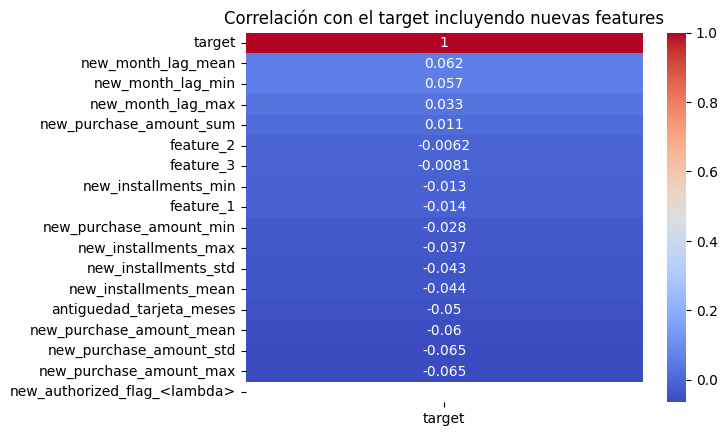

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_relevantes = [
    'feature_1', 'feature_2', 'feature_3',
    'antiguedad_tarjeta_meses',

    # columnas de transacciones nuevas
    'new_purchase_amount_sum', 'new_purchase_amount_mean', 'new_purchase_amount_min', 'new_purchase_amount_max', 'new_purchase_amount_std',
    'new_installments_mean', 'new_installments_max', 'new_installments_min', 'new_installments_std',
    'new_month_lag_min', 'new_month_lag_max', 'new_month_lag_mean',
    'new_authorized_flag_<lambda>',

    # columnas de transacciones históricas
    'hist_purchase_amount_sum', 'hist_purchase_amount_mean', 'hist_purchase_amount_min', 'hist_purchase_amount_max', 'hist_purchase_amount_std',
    'hist_installments_mean', 'hist_installments_max', 'hist_installments_min', 'hist_installments_std',
    'hist_month_lag_min', 'hist_month_lag_max', 'hist_month_lag_mean',
    'hist_authorized_flag_<lambda>',

    'target'
]


corr = train_merged[cols_relevantes].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target incluyendo nuevas features')
plt.show()




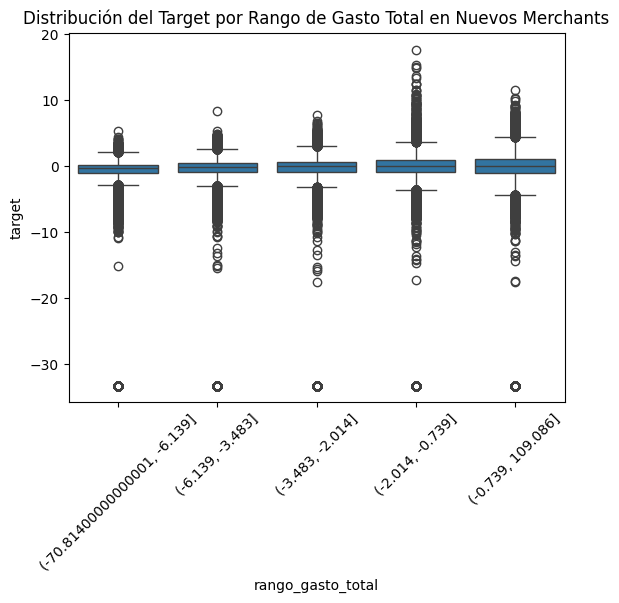

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea rangos de compra total
train_merged['rango_gasto_total'] = pd.qcut(train_merged['new_purchase_amount_sum'], q=5, duplicates='drop')

sns.boxplot(x='rango_gasto_total', y='target', data=train_merged)
plt.title('Distribución del Target por Rango de Gasto Total en Nuevos Merchants')
plt.xticks(rotation=45)
plt.show()


La mediana del target en cada rango parece estar cercana a cero o ligeramente negativa para los primeros cuatro rangos.

En el rango de gasto más alto (último bin, positivo grande) la mediana parece un poco más alta (cercana a cero o ligeramente positiva), indicando que los clientes con gasto muy alto en nuevos merchants tienden a tener un target promedio algo mejor (mayor).

El gasto en nuevos merchants por sí solo no es un predictor sólido o exclusivo para el target, ya que hay mucha variabilidad dentro de cada rango.

Sin embargo, un mayor gasto total tiende a estar asociado a una ligera mejora del target promedio.

Deberías combinar esta variable con otras (como las históricas o características del cliente) para obtener mejores predicciones.

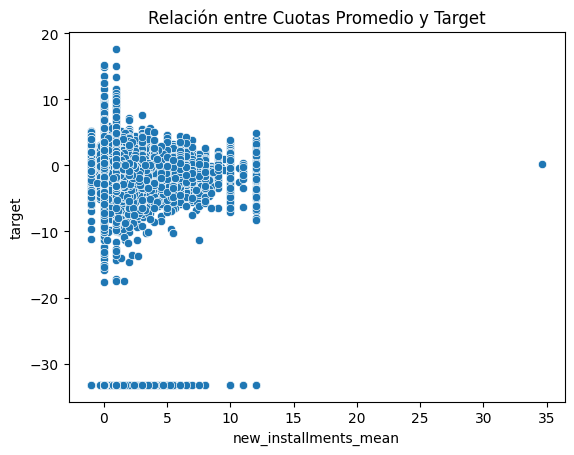

In [ ]:
sns.scatterplot(x='new_installments_mean', y='target', data=train_merged)
plt.title('Relación entre Cuotas Promedio y Target')
plt.show()


La mayoría de los datos están concentrados con un promedio de cuotas (new_installments_mean) entre 0 y aproximadamente 10.

Fuera de ese rango (por ejemplo, el punto aislado con cuotas cercanas a 35), son casos muy poco frecuentes y probablemente atípicos.

Hay algunos outliers evidentes tanto en cuotas promedio (punto muy alto) como en target (valores extremos positivos y negativos).

Podría ser útil analizar esos outliers por separado o aplicar transformaciones/filtrado para entender mejor la relación.

La variable new_installments_mean probablemente no tenga una correlación fuerte con el target, por lo que debería usarse combinada con otras variables.

Es importante validar si esta variable aporta algo en modelos más complejos, como árboles o modelos no lineales.



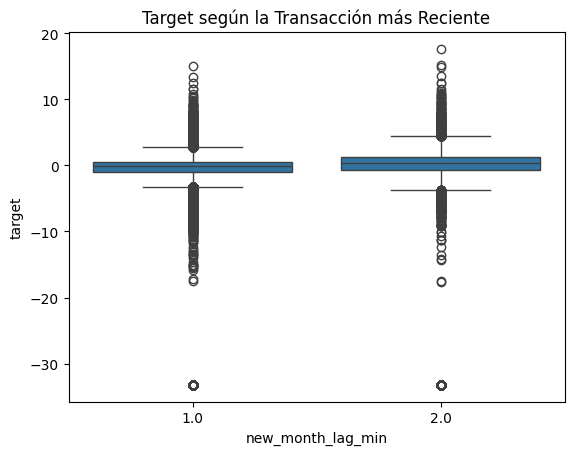

In [ ]:
sns.boxplot(x='new_month_lag_min', y='target', data=train_merged)
plt.title('Target según la Transacción más Reciente')
plt.show()


##Uso de Historical


#6.Exploración Avanzada

In [ ]:
# Asegúrate de que la columna 'purchase_date' exista y esté en formato de fecha
vdf_new_trans['purchase_date'] = pd.to_datetime(vdf_new_trans['purchase_date'], errors='coerce')
# Eliminar filas con fechas inválidas
vdf_new_trans = vdf_new_trans.dropna(subset=['purchase_date'])



In [ ]:
# Extraer componentes temporales
vdf_new_trans['year'] = vdf_new_trans['purchase_date'].dt.year
vdf_new_trans['month'] = vdf_new_trans['purchase_date'].dt.month
vdf_new_trans['day'] = vdf_new_trans['purchase_date'].dt.day
vdf_new_trans['dayofweek'] = vdf_new_trans['purchase_date'].dt.dayofweek
vdf_new_trans['weekofyear'] = vdf_new_trans['purchase_date'].dt.isocalendar().week


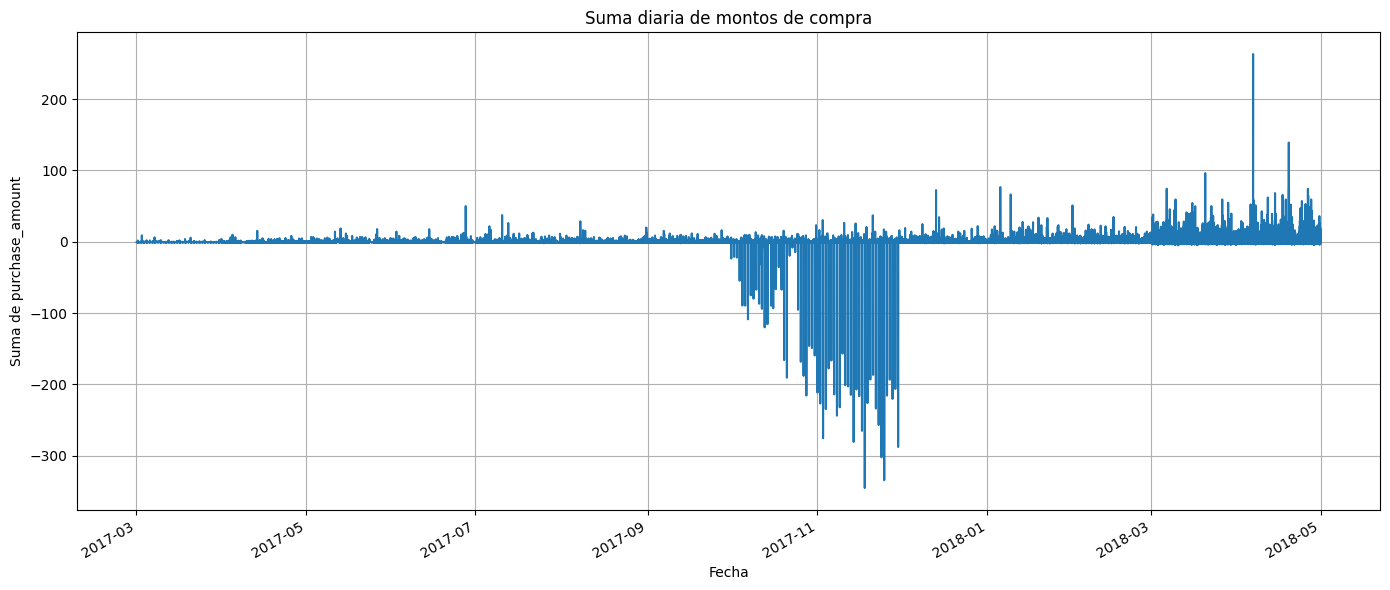

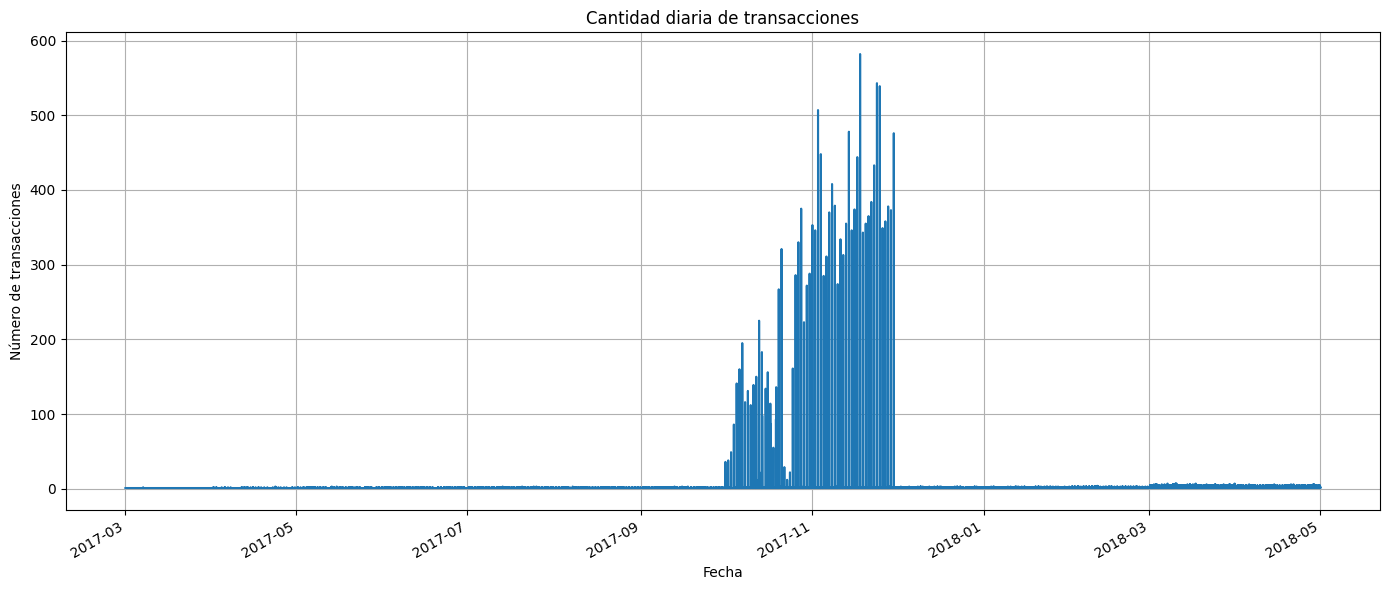

In [ ]:
import matplotlib.pyplot as plt
# Agrupar por fecha para obtener la suma de montos de compra
daily_sum = vdf_new_trans.groupby('purchase_date')['purchase_amount'].sum()

plt.figure(figsize=(14,6))
daily_sum.plot()
plt.title('Suma diaria de montos de compra')
plt.ylabel('Suma de purchase_amount')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

# Agrupar por fecha para contar número de transacciones
daily_count = vdf_new_trans.groupby('purchase_date').size()

plt.figure(figsize=(14,6))
daily_count.plot()
plt.title('Cantidad diaria de transacciones')
plt.ylabel('Número de transacciones')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()


La serie temporal obtenida muestra que la mayoría de los días presentan una suma total de compras negativa, con algunos picos positivos que destacan en ciertas fechas. Este comportamiento puede parecer contradictorio si se espera que los montos de compra representen valores monetarios reales, pero tiene una justificación razonable dentro del contexto de los datos.

Los valores negativos no indican necesariamente pérdidas o reembolsos. En este caso, la variable purchase_amount se encuentra normalizada o transformada debido a que los datos provienen de una competencia de Kaggle. Este tipo de competencias, por razones de privacidad, anonimización y equidad en el modelado, suele aplicar transformaciones a las variables numéricas. Es probable que se haya aplicado una escala logarítmica, un centrado en la media, una estandarización (z-score) o alguna forma de codificación numérica para ocultar los valores reales. Esto explica que el promedio del purchase_amount sea negativo, y que incluso el valor máximo (263.15) sea significativamente más alto que la mayoría de observaciones.

En este sentido, lo que importa en el análisis no es el valor absoluto, sino el comportamiento relativo entre días, los patrones temporales y la posible presencia de estacionalidad, picos o tendencias que podrían correlacionarse con otras variables o con el comportamiento futuro de los comerciantes.

In [ ]:
vdf_new_trans['purchase_amount'].describe()

,purchase_amount
count,1.963031e+06
mean,-5.509690e-01
std,6.940043e-01
min,-7.468928e-01
25%,-7.166294e-01
50%,-6.748406e-01
75%,-5.816162e-01
max,2.631575e+02


In [ ]:

#Agrupar por merchant_category_id
grouped = vdf_new_trans.groupby('merchant_category_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

#Se ordena por total_purchase_amount descendente
grouped_sorted = grouped.sort_values(by='total_purchase_amount', ascending=False)

print(grouped_sorted.head(10))  # Mostrar top 10 categorías con más ventas


     merchant_category_id  transaction_count  total_purchase_amount  \
72                    210               3803            4492.303862   
113                   333               4817            3333.705812   
157                   434               8812            1639.711224   
178                   491               2687            1168.620884   
289                   808                587             717.675174   
134                   385                871             517.335378   
126                   363               3694             478.883330   
82                    245                 85             432.797710   
203                   550               1757             265.057030   
114                   334                 15             246.751252   

     average_purchase_amount  
72                  1.181253  
113                 0.692071  
157                 0.186077  
178                 0.434917  
289                 1.222615  
134                 0.593956  
1

Se realizó un análisis agrupando las transacciones por el campo merchant_category_id, con el objetivo de identificar cuáles son las categorías de comerciantes con mayor volumen y frecuencia de actividad comercial. Para ello, se calcularon tres indicadores principales: el número total de transacciones por categoría, la suma total de los montos de compra y el promedio del monto por transacción.

Los resultados muestran que la categoría 210 es la más destacada, con un total de 3803 transacciones y una suma acumulada de compras de 4492.30 unidades monetarias. Esto indica un alto volumen de actividad con un monto promedio por transacción de 1.18. La segunda categoría más relevante es la 333, que registra incluso más transacciones (4817), pero con un monto total menor (3333.71), lo que revela un menor valor promedio por transacción de 0.69. Esto puede interpretarse como una categoría donde las compras son muy frecuentes, pero de bajo importe unitario.

In [ ]:
#Agrupamiento inicial por tipo de comercio o categoría.
grouped_subsector = vdf_new_trans.groupby('subsector_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

print(grouped_subsector.sort_values(by='total_purchase_amount', ascending=False).head(10))


    subsector_id  transaction_count  total_purchase_amount  \
34            35               5233            4144.216910   
3              3               6237            2748.925576   
9             10               9849            2041.143283   
5              5               1316               7.048080   
27            28                  8              -5.625385   
0             -1                 20              -5.707430   
10            11                560             -37.123944   
39            40                953            -357.192207   
22            23               1423            -529.921674   
13            14               1488            -673.356672   

    average_purchase_amount  
34                 0.791939  
3                  0.440745  
9                  0.207244  
5                  0.005356  
27                -0.703173  
0                 -0.285371  
10                -0.066293  
39                -0.374808  
22                -0.372398  
13               

El subsector identificado con el mayor monto acumulado de compras fue el 35, que alcanzó más de cuatro mil unidades monetarias distribuidas en poco más de cinco mil transacciones. Esto refleja una actividad comercial destacada y una media de compra por transacción relativamente alta, lo que sugiere una combinación de frecuencia y valor. Le sigue el subsector 3, con más de seis mil transacciones y un volumen total de compras superior a dos mil setecientas unidades, aunque con un ticket promedio más bajo en comparación.

Otro subsector relevante es el 10, que presenta casi diez mil transacciones pero con un volumen total de compras inferior, lo que indica muchas operaciones de bajo monto. También se observa la existencia de subsectores con valores negativos en el total de compras, como los subsectores 28, 23, 14 y 40. Esto puede deberse a devoluciones, reembolsos u otros movimientos financieros inversos que son registrados como montos negativos. Estos comportamientos deben ser tenidos en cuenta al momento de interpretar el desempeño comercial, ya que afectan directamente el balance general de actividad en estos subsectores.

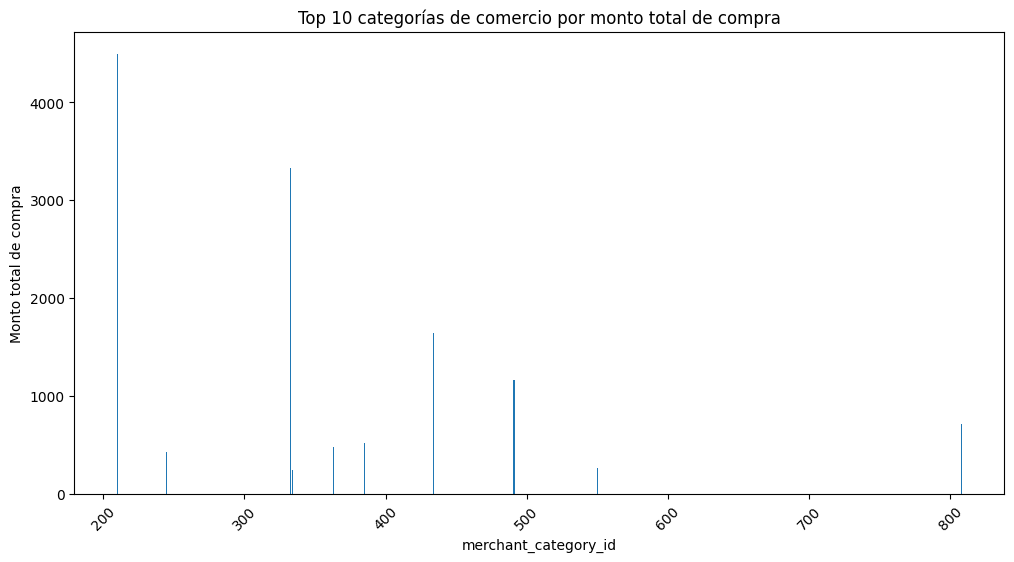

In [ ]:
top_categories = grouped_sorted.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_categories['merchant_category_id'], top_categories['total_purchase_amount'])
plt.title('Top 10 categorías de comercio por monto total de compra')
plt.xlabel('merchant_category_id')
plt.ylabel('Monto total de compra')
plt.xticks(rotation=45)
plt.show()


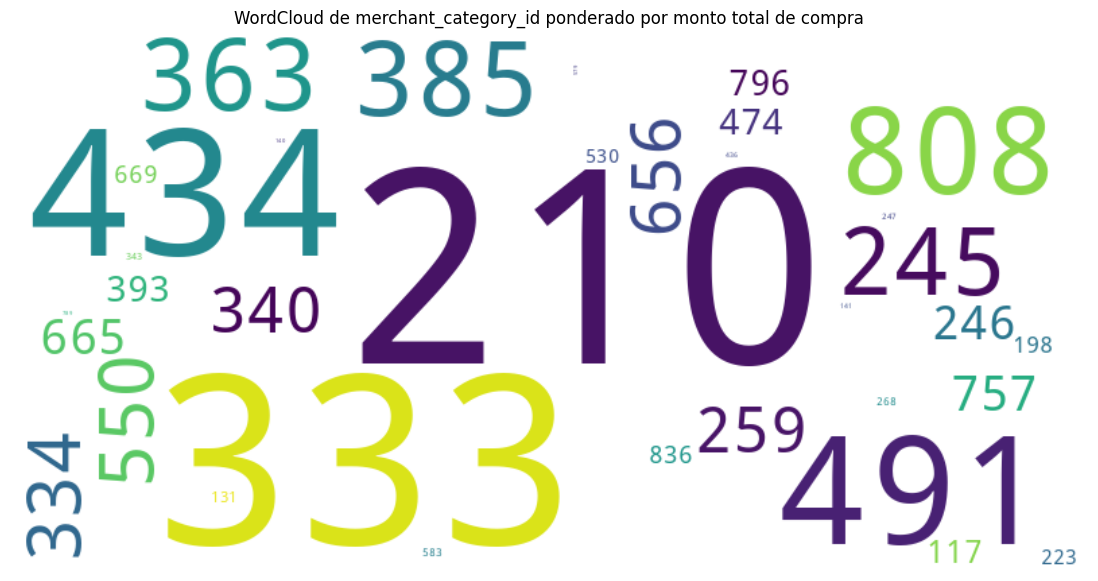

In [ ]:
freq_dict_str = {str(k): v for k, v in freq_dict.items()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict_str)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de merchant_category_id ponderado por monto total de compra')
plt.show()


#7.Calidad de los Datos

In [ ]:
# Identificación de valores faltantes.

In [ ]:
# Análisis de duplicados y valores atípicos.

In [ ]:
# Errores de codificación, columnas irrelevantes, formatos incorrectos.

In [ ]:
# Posibles inconsistencias entre archivos (ej.: merchant_ids que no existen).

#8.Análisis de Relaciones entre Tablas

In [ ]:
# ¿Cómo se relacionan las tablas? (train/test con transacciones y merchants).

| Tabla                       | Relaciona con...                | Clave de unión | Tipo de relación  |
| --------------------------- | ------------------------------- | -------------- | ----------------- |
| `train.csv` / `test.csv`    | `historical_transactions.csv`   | `card_id`      | 1 a muchos (1\:N) |
| `train.csv` / `test.csv`    | `new_merchant_transactions.csv` | `card_id`      | 1 a muchos (1\:N) |
| `historical_transactions`   | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |
| `new_merchant_transactions` | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |


1. train.csv / test.csv
Clave primaria: card_id

Relaciona con: transacciones históricas y nuevas

2. historical_transactions y new_merchant_transactions
Clave foránea: card_id → viene de train/test

Clave foránea: merchant_id → apunta a merchants

3. merchants.csv
Clave primaria: merchant_id

No tiene referencias a card_id directamente, es solo receptor

In [ ]:
# Análisis de cardinalidad y potenciales problemas de duplicación.

| Relación                   | Cardinalidad                | Posibles problemas                                            |
| -------------------------- | --------------------------- | ------------------------------------------------------------- |
| `train` ↔ `historical`     | 1 a muchos                  | Duplicación de `train` al hacer `merge` directo               |
| `train` ↔ `merchants`      | Indirecta vía transacciones | Cuidado si se hace doble join con merchants desde dos fuentes |
| `historical` ↔ `merchants` | muchos a 1                  | Seguro: no hay duplicación                                    |



1. Relación entre train/test y historical_transactions

La relación entre estas tablas es de uno a muchos (1:N), unidas a través del campo card_id. Esto significa que cada entrada en train o test puede estar asociada con decenas o incluso cientos de transacciones históricas.

Un merge directo utilizando card_id como clave puede inflar el número de filas del dataset, ya que replicará la información de train tantas veces como transacciones tenga cada tarjeta. Por ejemplo, si un card_id presenta 200 transacciones, la fila correspondiente de train se repetirá 200 veces.

Recomendación: Antes de realizar la unión, es necesario aplicar funciones de agregación sobre las transacciones agrupadas por card_id (por ejemplo: sumatorias, promedios, conteos, últimas fechas, entre otras), y luego realizar el merge.

2. Relación entre train/test y new_merchant_transactions

Esta relación también es de uno a muchos (1:N) por card_id, de manera análoga al caso anterior. Aunque el volumen de datos en new_merchant_transactions suele ser menor que en historical_transactions, la problemática es similar.

Recomendación: Se recomienda aplicar agregaciones por card_id antes de realizar la unión con train o test, para evitar la duplicación masiva de datos.

3. Relación entre historical_transactions y merchants

Esta relación es de muchos a uno (N:1), a través de la clave merchant_id. Es decir, múltiples transacciones pueden estar asociadas a un único comercio.

La unión no genera duplicación de registros, ya que cada transacción apunta a un único comercio. Sin embargo, es importante tener en cuenta que algunos valores de merchant_id pueden ser nulos o inválidos, por lo que un inner join podría provocar la pérdida de información.

Recomendación: Se recomienda utilizar un left join desde historical_transactions hacia merchants para preservar todos los registros de transacciones, aún si no tienen comercio asociado.

4. Relación entre new_merchant_transactions y merchants

Este caso es análogo al anterior: una relación de muchos a uno (N:1) por merchant_id, con el mismo volumen de datos aproximado.

Recomendación: Al igual que con historical_transactions, se sugiere aplicar un left join desde new_merchant_transactions hacia merchants para mantener la integridad de las transacciones.

5. Consideraciones sobre uniones múltiples con merchants

Si se realiza la unión de la tabla merchants tanto con historical_transactions como con new_merchant_transactions, existe el riesgo de redundancia de columnas como merchant_category_id, subsector_id, entre otras, que podrían aparecer duplicadas y generar ambigüedad.

Recomendación: En estos casos, se debe renombrar las columnas provenientes de merchants con prefijos diferenciados (por ejemplo: hist_merchant_* y new_merchant_*) para evitar conflictos en el dataset final y asegurar la trazabilidad de los datos.



#9.Insights Relevantes

In [ ]:
# Descubrimientos clave
# (ej.: variables con mayor dispersión, columnas con datos faltantes, patrones evidentes).

In [ ]:
# Hipótesis preliminares (ej.: las tarjetas con más antigüedad tienden a mayor score).

#10.Conclusiones y Próximos Pasos

In [ ]:
# Lista de variables relevantes para modelado.

In [ ]:
# Recomendaciones para la preparación de datos (fase siguiente).

In [ ]:
# Validación de supuestos con el equipo de negocio (si aplica).